In [10]:
import os
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns


PROJECT_ROOT = f"{os.path.expanduser('~')}/AIAA5030/AIAA5030_Data_Mining_Group13_Visualization"
FIGURE_ROOT = f"{PROJECT_ROOT}/figure"

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import umap
import warnings
warnings.filterwarnings('ignore')
from matplotlib.backends.backend_pdf import PdfPages

# 设置样式
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 10
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# 1. 加载样本数据集
def load_sample_data(dataset_name='iris'):
    if dataset_name == 'iris':
        data = datasets.load_iris()
        X = data.data
        y = data.target
        target_names = data.target_names
        title = "UMAP Visualization of Iris Dataset"
    elif dataset_name == 'digits':
        data = datasets.load_digits()
        X = data.data
        y = data.target
        target_names = [str(i) for i in range(10)]
        title = "UMAP Visualization of Digits Dataset"
    elif dataset_name == 'wine':
        data = datasets.load_wine()
        X = data.data
        y = data.target
        target_names = data.target_names
        title = "UMAP Visualization of Wine Dataset"
    elif dataset_name == 'breast_cancer':
        data = datasets.load_breast_cancer()
        X = data.data
        y = data.target
        target_names = ['Malignant', 'Benign']
        title = "UMAP Visualization of Breast Cancer Dataset"
    else:
        raise ValueError("未知数据集。请选择 'iris', 'digits', 'wine', 或 'breast_cancer'")
    
    return X, y, target_names, title

# 2. UMAP降维
def apply_umap(X, n_components=2, n_neighbors=15, min_dist=0.1, random_state=42):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    reducer = umap.UMAP(
        n_components=n_components,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        random_state=random_state,
        metric='euclidean'
    )
    
    embedding = reducer.fit_transform(X_scaled)
    return embedding, reducer

# 3. 2D可视化
def plot_umap_2d(embedding, y, target_names, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    scatter = ax.scatter(
        embedding[:, 0], 
        embedding[:, 1], 
        c=y, 
        cmap='tab10', 
        s=80, 
        alpha=0.8,
        edgecolors='w',
        linewidth=1.0
    )
    
    ax.set_xlabel('UMAP Component 1', fontsize=14)
    ax.set_ylabel('UMAP Component 2', fontsize=14)
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3, linestyle='--')

    legend_elements = [plt.Line2D(
        [0], [0], marker='o', color='w',
        markerfacecolor=plt.cm.tab10(i/len(target_names)),
        markersize=12, label=name, markeredgewidth=1)
        for i, name in enumerate(target_names)]
    ax.legend(handles=legend_elements, title="Classes", loc='best')

    plt.tight_layout()
    return fig

# 4. 3D可视化
def plot_umap_3d(embedding_3d, y, target_names, title):
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        embedding_3d[:, 0], 
        embedding_3d[:, 1], 
        embedding_3d[:, 2], 
        c=y, 
        cmap='tab10', 
        s=60, 
        alpha=0.8,
        edgecolors='w',
        linewidth=0.8
    )

    ax.set_xlabel('UMAP Component 1', fontsize=12)
    ax.set_ylabel('UMAP Component 2', fontsize=12)
    ax.set_zlabel('UMAP Component 3', fontsize=12)
    ax.set_title(f"{title} (3D)", fontsize=16, fontweight='bold', pad=20)

    legend_elements = [plt.Line2D(
        [0], [0], marker='o', color='w',
        markerfacecolor=plt.cm.tab10(i/len(target_names)),
        markersize=10, label=name)
        for i, name in enumerate(target_names)]
    ax.legend(handles=legend_elements)

    ax.view_init(25, 45)

    plt.tight_layout()
    return fig


# 5. 主程序：保存成两个 PDF 文件
def main():
    dataset_choice = 'iris'

    umap_params = {
        'n_neighbors': 15,
        'min_dist': 0.1,
        'n_components_2d': 2,
        'n_components_3d': 3,
        'random_state': 42
    }

    # 加载数据
    X, y, target_names, title = load_sample_data(dataset_choice)

    # UMAP 2D
    embedding_2d, _ = apply_umap(
        X,
        n_components=umap_params['n_components_2d'],
        n_neighbors=umap_params['n_neighbors'],
        min_dist=umap_params['min_dist'],
        random_state=umap_params['random_state']
    )

    # UMAP 3D
    embedding_3d, _ = apply_umap(
        X,
        n_components=umap_params['n_components_3d'],
        n_neighbors=umap_params['n_neighbors'],
        min_dist=umap_params['min_dist'],
        random_state=umap_params['random_state']
    )

    # 绘制图形
    fig_2d = plot_umap_2d(embedding_2d, y, target_names, f"{title} (2D)")
    fig_3d = plot_umap_3d(embedding_3d, y, target_names, title)

    # ------------ 保存为两个 PDF ------------
    pdf_2d = f"{FIGURE_ROOT}/umap_2d_{dataset_choice}.png"
    pdf_3d = f"{FIGURE_ROOT}/umap_3d_{dataset_choice}.png"

    fig_2d.savefig(pdf_2d, dpi=300, bbox_inches='tight')
    fig_3d.savefig(pdf_3d, dpi=300, bbox_inches='tight')

    print("PDF 文件已保存：")
    print(" -", pdf_2d)
    print(" -", pdf_3d)

    plt.close('all')

    return embedding_2d, embedding_3d, pdf_2d, pdf_3d


FileNotFoundError: [Errno 2] No such file or directory: '/hpc2hdd/home/hli994/AIAA5030_Data_Mining_Group13_Visualization/figure/umap_2d_iris.png'

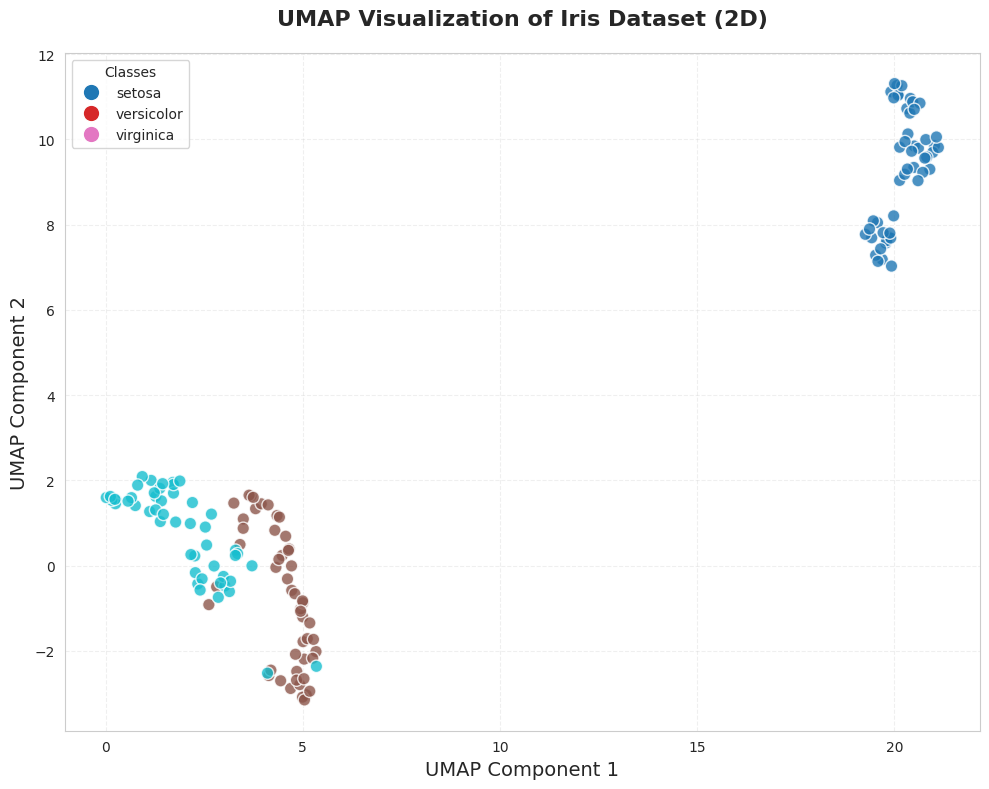

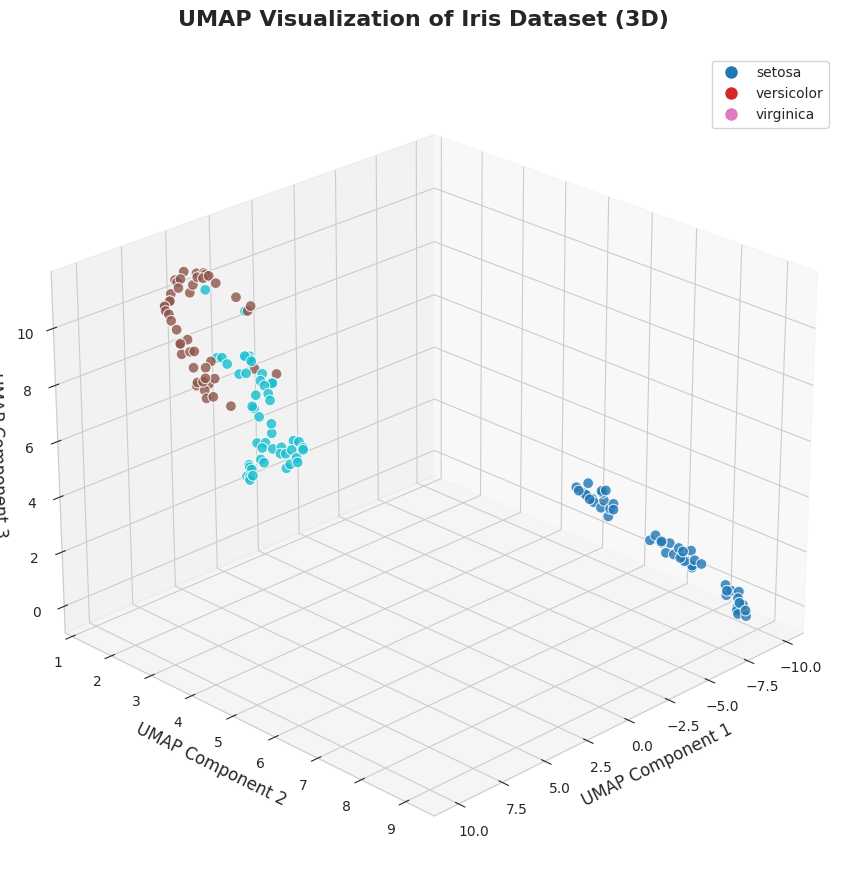

In [9]:
main()